# **Esra Kantarcı - 2021**

Google Colab Version of Notebook: [Link](https://colab.research.google.com/drive/1yYOwgWt2AZvEKg3Th9edugJtElGLCdLO?usp=sharing) 


First, we are importing the main machine learning, plotting and data processing libraries:

In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode (connected = True)
!pip install pygal

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm


## for machine learning
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


## for encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Business Understanding:


The first task according to CRISP-DM methodology is business understanding in a data mining project. So, before starting anything, we need to understand the problem, detail it and decide where to begin or where to stop. 

## Task:
*The dataset obtained from CDC Covid Data and has the following headers.*

*cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group, race_ethnicity_combined, hosp_yn, icu_yn, death_yn, medcond_yn*

*Among the fields,  cdc_report_dt,pos_spec_dt,onset_dt,current_status fields may be ignored. You may have to deal with some missing/unknown data the way you like it.  You may also need to reduce the race_ethnicity_combined to fewer nominal choices.*

*Some of the things you could do with this data (but should not be limitted):*

* *Being able to print the intensity of pandemic by month*
* *Age group, race, medical condition effect on Death Rate*
* *Recognition of some strong relationship between certain fields*
* *Construction of a Decission Tree*

*In it you should attached screenshot of your knime workflow and pandas code and charts with a story that explains your findings.*

*Python and Knime may solve different part of the problem. I want you to experience both of these technologies and take advantages of either depending on the part that you are dealing with.*


## First Evaluation of the Problem:


*   We have CDC Covid Data and we are asked to analysis the data freely.
*   Some data rows need to be processed due to missing values.
* Some columns can be ignored.
* We can group or re-define the nominal classes for better use.
* We need to provide charts of analysis
* Use both KNIME and python

So, it is better to check the column and the values they represent, then find the relationships of the data by using plots, heatmaps, correlations.

In [ ]:
df = pd.read_csv('CovidSurveillance.csv')
df.head()

cdc_case_earliest_dt cdc_report_dt pos_spec_dt  ... icu_yn death_yn medcond_yn
0           2020/11/14    2021/02/08         NaN  ...     No       No         No
1           2020/07/15    2020/08/20         NaN  ...     No       No         No
2           2020/06/23    2020/09/01         NaN  ...     No       No         No
3           2020/05/09    2020/08/13         NaN  ...     No       No         No
4           2020/10/20    2020/10/30         NaN  ...     No       No         No

[5 rows x 12 columns]

In [ ]:
print(df.columns.values)

['cdc_case_earliest_dt' 'cdc_report_dt' 'pos_spec_dt' 'onset_dt'
 'current_status' 'sex' 'age_group' 'race_ethnicity_combined' 'hosp_yn'
 'icu_yn' 'death_yn' 'medcond_yn']


# Data Understanding:

So we have these columns which are represented above. For the better understanding of the data, we need to check CDC website for the details.

[CDC Website](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-Profile/xigx-wn5e) explains these column values and also provides helpful histograms for insights. You can check them out from the source. 



---



As we know in the data there are vague values like "unknown" of the data according to histogram in the official website, but as I do not know the heatmap yet, I want to keep other columns as well. However, I want to drop cdc_report_dt, post_spec_dt and onset_dt beforehand and do not waste time to filter/manipulate these column values. 

So, as the task suggest, we need to use KNIME as well. This is why, getting the strong sides of the both part, I want to use KNIME for big data evaluation with built-in features. But python's visualization is better and there are many options for evaluation, too. 

I will check out the interactive histograms in KNIME, manipulate the data with python (not because it is better, but I find it faster since I am used to it) and evaluate outputs in both platform. 

Now, let's see the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901599 entries, 0 to 901598
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   cdc_case_earliest_dt     901599 non-null  object
 1   cdc_report_dt            901599 non-null  object
 2   pos_spec_dt              586023 non-null  object
 3   onset_dt                 836668 non-null  object
 4   current_status           901599 non-null  object
 5   sex                      901599 non-null  object
 6   age_group                901599 non-null  object
 7   race_ethnicity_combined  901599 non-null  object
 8   hosp_yn                  901599 non-null  object
 9   icu_yn                   901599 non-null  object
 10  death_yn                 901599 non-null  object
 11  medcond_yn               901599 non-null  object
dtypes: object(12)
memory usage: 82.5+ MB


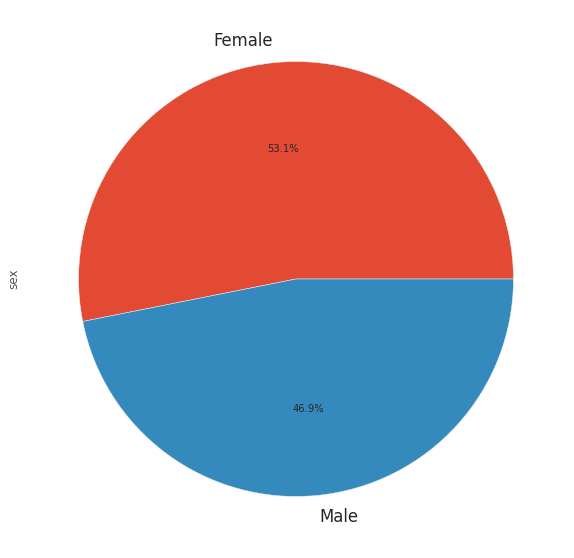

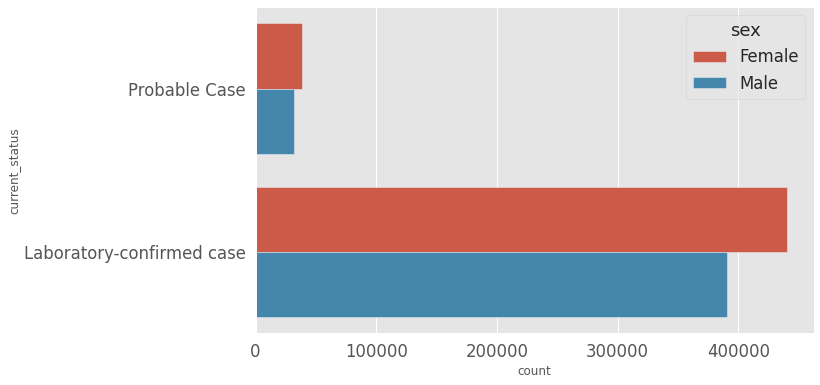

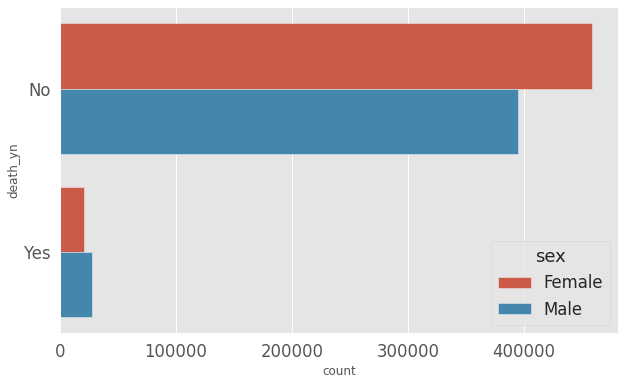

In [ ]:
df.info()

plt.figure(figsize=(20, 10))
plt.style.use("ggplot")

df['sex'].value_counts().plot.pie(autopct="%1.1f%%")

plt.figure(figsize=(10,6))
sns.countplot(y="current_status",hue ='sex',data=df)

plt.figure(figsize=(10,6))
sns.countplot(y="death_yn",hue ='sex',data=df)



## Initial Findings - 1:

Even though there are more female patients than males, the death count of the male seems higher than females as you can see the graphs above. 

## Initial Findings - 2 :

Below this section, you see there are null values in specific columns. 
pos_spec_dt stands for date of first positive specimen collection and onset_dt is symptom onset date, if the patient is symptomatic. We will not use these labels in our evaluation so, I will drop these columns.

In [ ]:
df.isnull().sum()

cdc_case_earliest_dt            0
cdc_report_dt                   0
pos_spec_dt                315576
onset_dt                    64931
current_status                  0
sex                             0
age_group                       0
race_ethnicity_combined         0
hosp_yn                         0
icu_yn                          0
death_yn                        0
medcond_yn                      0
dtype: int64

In [ ]:
# Dropping the columns
columns_to_drop = ["cdc_report_dt", "pos_spec_dt", "onset_dt"]
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901599 entries, 0 to 901598
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   cdc_case_earliest_dt     901599 non-null  object
 1   current_status           901599 non-null  object
 2   sex                      901599 non-null  object
 3   age_group                901599 non-null  object
 4   race_ethnicity_combined  901599 non-null  object
 5   hosp_yn                  901599 non-null  object
 6   icu_yn                   901599 non-null  object
 7   death_yn                 901599 non-null  object
 8   medcond_yn               901599 non-null  object
dtypes: object(9)
memory usage: 61.9+ MB


In [ ]:
# Removing missing values 
df = df.dropna()
df.describe().T

count unique                        top    freq
cdc_case_earliest_dt     901599    471                 2020/11/09    5865
current_status           901599      2  Laboratory-confirmed case  830822
sex                      901599      2                     Female  479010
age_group                901599     10              20 - 29 Years  149512
race_ethnicity_combined  901599      9        White, Non-Hispanic  470395
hosp_yn                  901599      4                         No  746708
icu_yn                   901599      2                         No  856413
death_yn                 901599      2                         No  853653
medcond_yn               901599      2                         No  520132

# Data Preprocessing
First, cdc_case_earliest_dt is in String format, we can use this column to analyze by time (not as time series though). So let's change this to DateTime format. 


## String Manipulation and Encoding

I also stored the original dataframe in anycase. 

I also mapped age_group, race_ethnicity and hosp_yn columns to prefferable chunks to tune the data before model training. 

### Age Group:
The mode shows that the mean value of the column was 20-29 years. I wanted to fill the missing values with the most frequent value to prevent data loss. After that, I decided to use the average values of each age gap for the label. 

### Race Ethnicity:
Heuristically I decided to remove ethnicity and only use the race value. Afterwards it is ready to encode the race column for the process.

### Hospitalized: 
There are vague values such as Missing and Unknown labels. However, it is highly possible that if these values are not entered, it means not hospitalized according the rates and frequency. Also due to buerocratic reasons, if the person is hospitalized, there should be paper-work, which ends up in the Yes value. 

After these processes, other than the date values, every column is encoded by using LabelEncoder. We could do this in KNIME, too.


In [ ]:
# String manipulation and encoding

# Column data-types:
df["cdc_case_earliest_dt"] = pd.to_datetime(df["cdc_case_earliest_dt"])
df.info()
df.head()

# Before encoding, I want to store original df in another dataframe
df_origin = df 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 901599 entries, 0 to 901598
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cdc_case_earliest_dt     901599 non-null  datetime64[ns]
 1   current_status           901599 non-null  object        
 2   sex                      901599 non-null  object        
 3   age_group                901599 non-null  object        
 4   race_ethnicity_combined  901599 non-null  object        
 5   hosp_yn                  901599 non-null  object        
 6   icu_yn                   901599 non-null  object        
 7   death_yn                 901599 non-null  object        
 8   medcond_yn               901599 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 68.8+ MB


In [ ]:
print(df.age_group.unique())
df.age_group.mode()

['0 - 9 Years' '10 - 19 Years' '20 - 29 Years' '30 - 39 Years'
 '40 - 49 Years' '50 - 59 Years' '60 - 69 Years' '70 - 79 Years'
 '80+ Years' 'Missing']


0    20 - 29 Years
dtype: object

In [ ]:
# I want to map age gaps into chunks of their median value. 
# mode shows 20-29 Years is the most frequent one, I will fill missing values
# with 20-29 years.

mapping={
        '0 - 9 Years': 5,
        '10 - 19 Years': 15,
        '20 - 29 Years': 25,
        '30 - 39 Years': 35,
        '40 - 49 Years': 45,
        '50 - 59 Years': 55,
        '60 - 69 Years': 65,
        '70 - 79 Years': 75,
        '80+ Years': 85,
        'Missing': 25
        }

df['age_chunks'] = df['age_group'].map(mapping)
df.head()

cdc_case_earliest_dt             current_status  ... medcond_yn age_chunks
0           2020-11-14              Probable Case  ...         No          5
1           2020-07-15  Laboratory-confirmed case  ...         No          5
2           2020-06-23              Probable Case  ...         No          5
3           2020-05-09              Probable Case  ...         No          5
4           2020-10-20              Probable Case  ...         No          5

[5 rows x 10 columns]

In [ ]:
# I also want to remove ethnicity and just use race
print(df.race_ethnicity_combined.unique())

df.race_ethnicity_combined.mode()

['American Indian/Alaska Native, Non-Hispanic' 'Unknown' 'Hispanic/Latino'
 'Black, Non-Hispanic' 'Asian, Non-Hispanic' 'Missing'
 'Multiple/Other, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'
 'White, Non-Hispanic']


0    White, Non-Hispanic
dtype: object

In [ ]:

mapping={
        'American Indian/Alaska Native, Non-Hispanic': 'Native Indian', 
         'Hispanic/Latino': 'Latino', 
        'Black, Non-Hispanic':'Black',
        'Asian, Non-Hispanic': 'Asian',
        'Multiple/Other, Non-Hispanic': 'Mixed',
        'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 'Native Islander',
        'White, Non-Hispanic': 'White',
        'Missing': 'White',
        'Unknown': 'White'
        }

df['race'] = df['race_ethnicity_combined'].map(mapping)
df.head()

cdc_case_earliest_dt             current_status  ... age_chunks           race
0           2020-11-14              Probable Case  ...          5  Native Indian
1           2020-07-15  Laboratory-confirmed case  ...          5  Native Indian
2           2020-06-23              Probable Case  ...          5  Native Indian
3           2020-05-09              Probable Case  ...          5  Native Indian
4           2020-10-20              Probable Case  ...          5  Native Indian

[5 rows x 11 columns]

In [ ]:
print(df.hosp_yn.unique())

mapping={'Unknown': 0,
         'Missing': 0,
         'No': 0,
         'Yes': 1
        }
df['hosp_yn_encoded'] = df['hosp_yn'].map(mapping)

['Unknown' 'No' 'Missing' 'Yes']


In [ ]:
# Encoding

encoder=LabelEncoder()

df['current_status_encoded']=encoder.fit_transform(df['current_status'])
df['icu_yn_encoded']=encoder.fit_transform(df['icu_yn'])
df['medcond_yn_encoded']=encoder.fit_transform(df['medcond_yn'])
df['death_encoded']=encoder.fit_transform(df['death_yn'])
df['sex_encoded']=encoder.fit_transform(df['sex'])
df['race_encoded']=encoder.fit_transform(df['race'])

df.head()

cdc_case_earliest_dt             current_status  ... sex_encoded race_encoded
0           2020-11-14              Probable Case  ...           0            4
1           2020-07-15  Laboratory-confirmed case  ...           0            4
2           2020-06-23              Probable Case  ...           0            4
3           2020-05-09              Probable Case  ...           0            4
4           2020-10-20              Probable Case  ...           0            4

[5 rows x 18 columns]

# Data Analysis

When COVID-19 is mentioned, everyone thinks the death rate and risks. So, at the first step of the analysis, I will consider death risks and risky groups.

According to age chunks - death chart, even though there are more patients between 5 and 55 years old, the death rate is visible and uncomfortable after age 55. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 504x648 with 0 Axes>

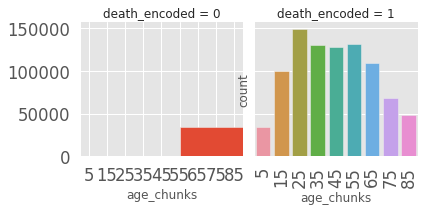

In [ ]:
## Let's analyze the data
plt.figure(figsize=(7, 9))
plt.style.use("ggplot")

g = sns.FacetGrid(df, col='death_encoded')
g.map(plt.hist, 'age_chunks', bins=20)
plt.xticks(rotation=90)
sns.countplot('age_chunks',data=df)

## Correlation Heatmap 

Using Seaborn's heatmap facility, we can see the relationship between hospitalized - intensive care - age and death. Also, having medical condition also has high relationship with age pair and moderate effect on hospitalization and death.

When we think about the COVID-19's nature and process, it is only normal to have these kind of relationship.

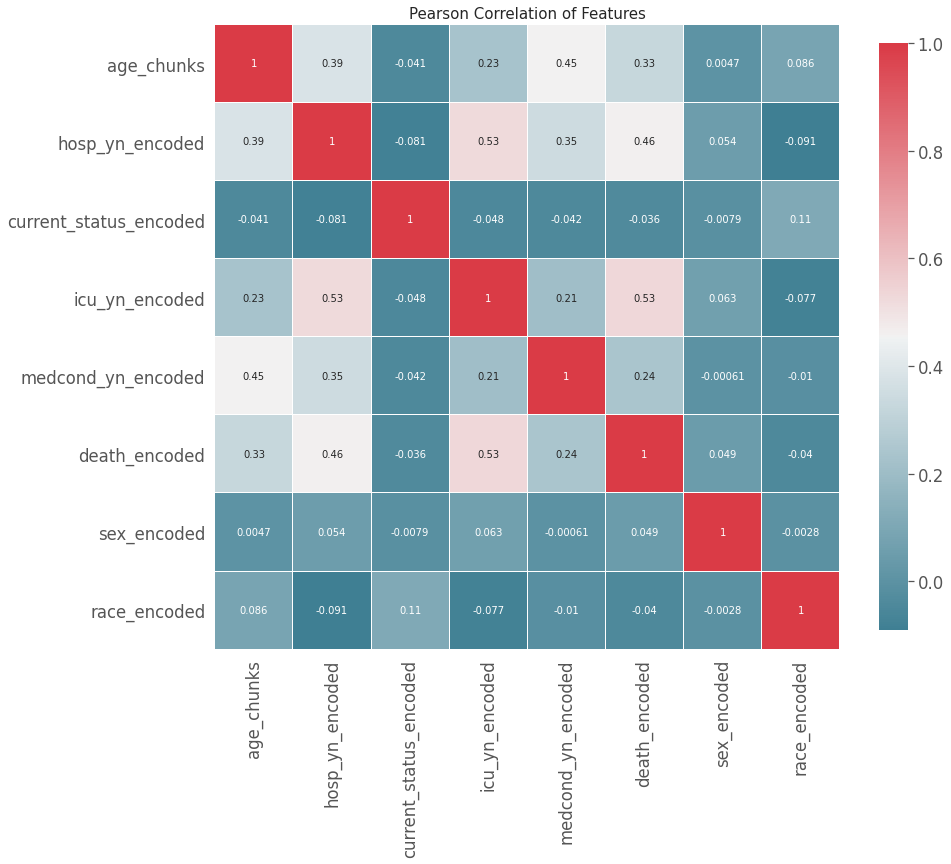

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

### Insights of Hospitalization and Intensive Care Unit Relationship:

As you can see, many of patients were not hospitalized and therefore not put under intensive care. We can analyze the ICU and age relationship in our training as well. Because I believe everyone is doing the same analysis for the death. But it is major thing to do, so I will also do it.

In [ ]:
crosstable=pd.crosstab(df['hosp_yn_encoded'],df['icu_yn_encoded'])
crosstable

icu_yn_encoded        0      1
hosp_yn_encoded               
0                761184    707
1                 95229  44479

## Data Analysis Graphs for Death Relationships

<Figure size 648x504 with 0 Axes>

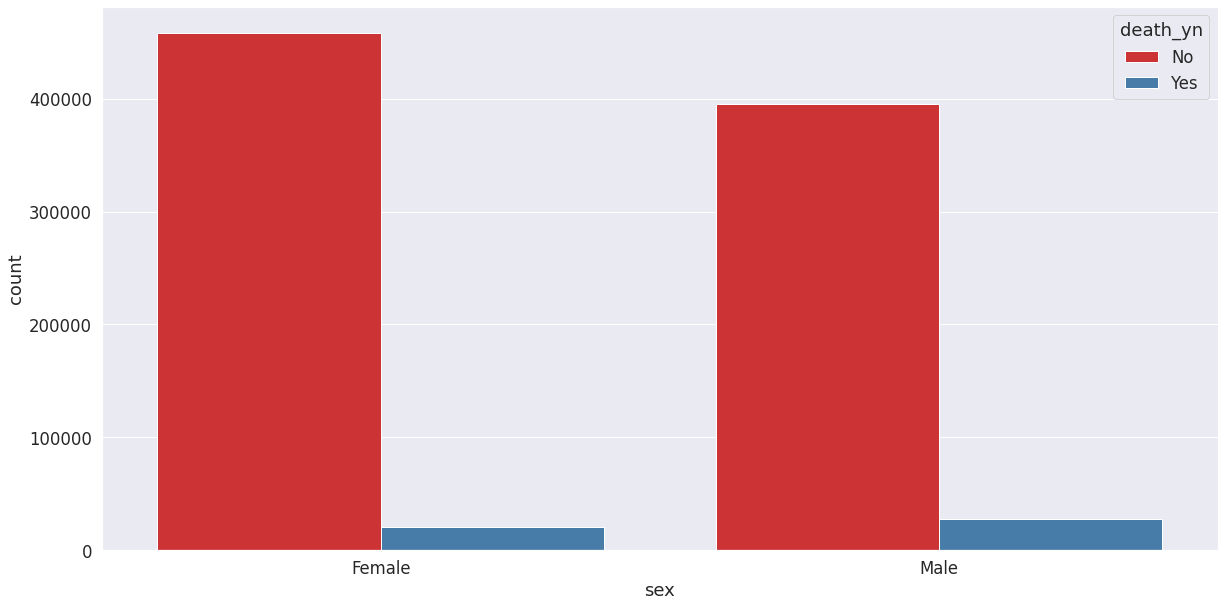

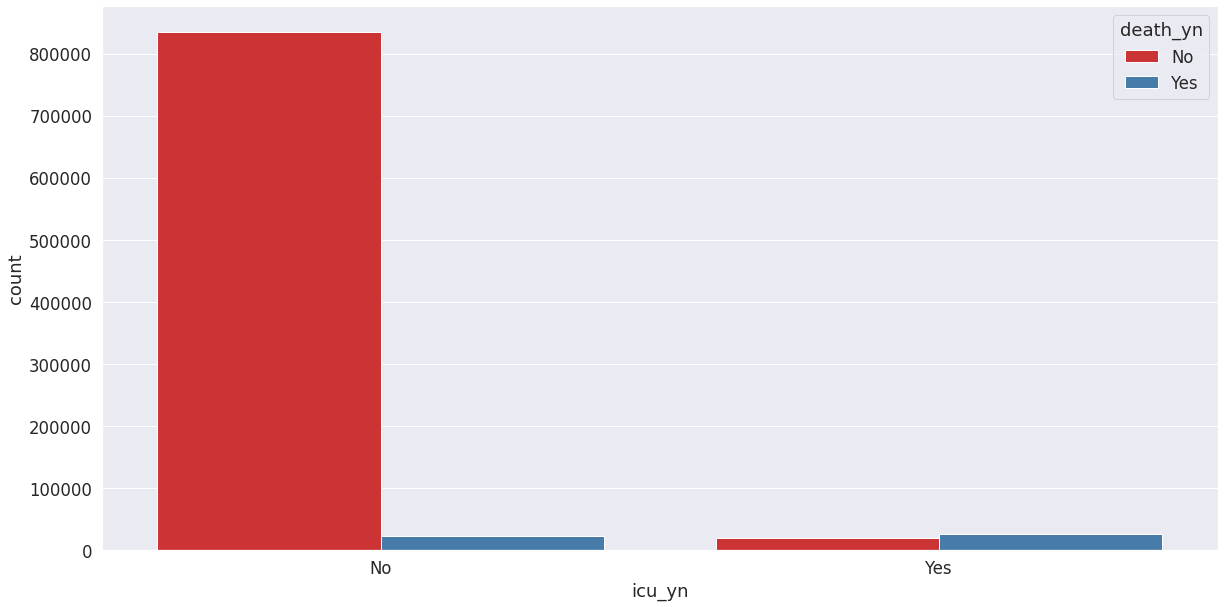

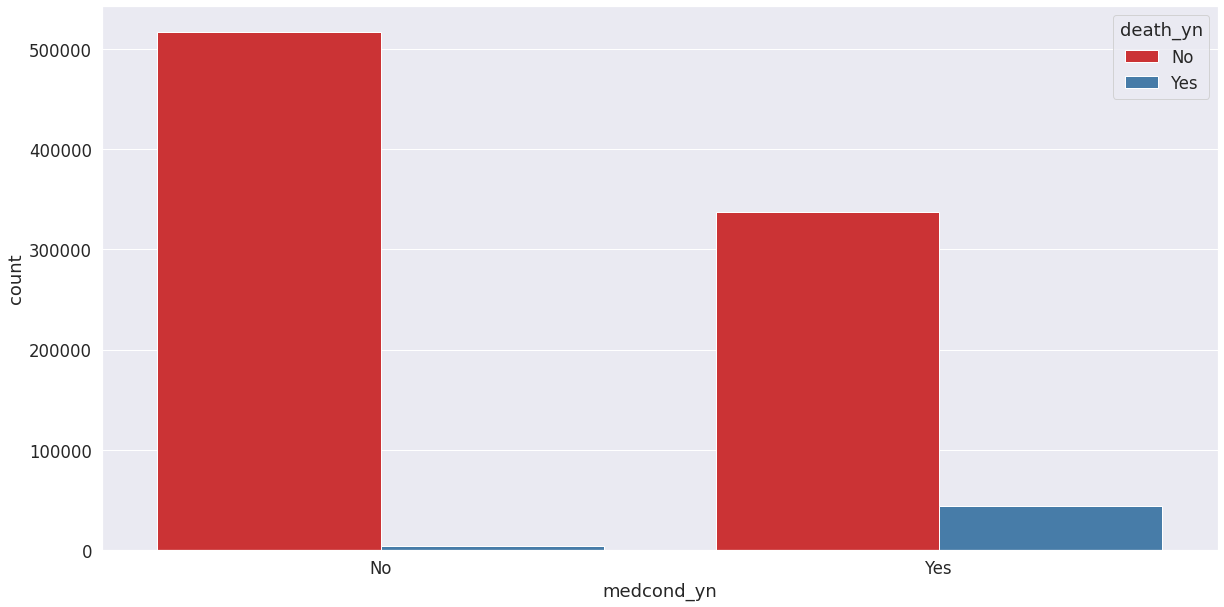

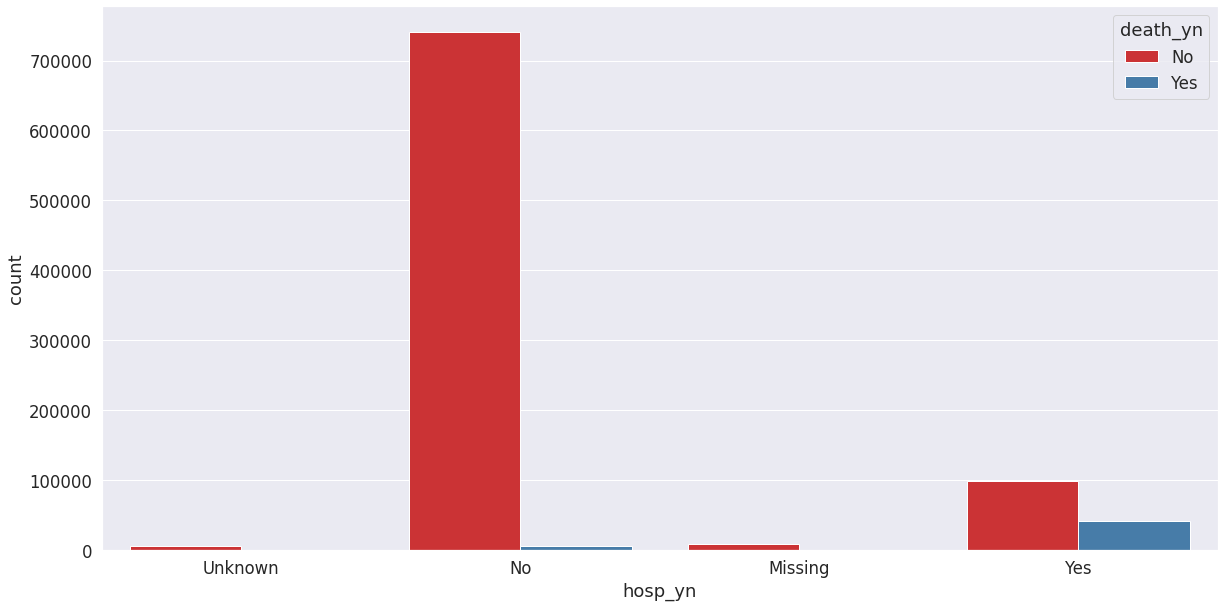

In [ ]:
# Reference: https://www.kaggle.com/accountstatus/covid-data-analysis 
df['month']=pd.DatetimeIndex(df['cdc_case_earliest_dt']).month
df['year']=pd.DatetimeIndex(df['cdc_case_earliest_dt']).year
df.head()

# Reference: https://www.kaggle.com/artyomkolas/covid-19-case-surveillance-public-use-dataset

target_column = ['death_yn']
columns_to_use = ['age_chunks', 'current_status', 'hosp_yn','icu_yn','medcond_yn','sex', 'race']
predictors = list(set(columns_to_use)-set(target_column))

plt.figure(figsize=(9, 7))
plt.style.use("ggplot")

sns.set(font_scale=1.5)

for el in predictors:
    plt.figure(figsize=(20, 10))
    plot_data = df[['death_yn', el]]
    try:
        sns.countplot(x=el, hue='death_yn', data=plot_data, palette='Set1')
    except:
        pass

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



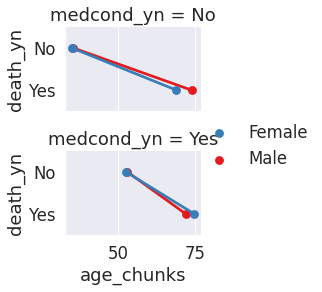

In [ ]:

grid = sns.FacetGrid(df, row='medcond_yn', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'age_chunks', 'death_yn', 'sex', palette='Set1')
grid.add_legend()

In [ ]:
crosstable=pd.crosstab(df['age_chunks'],df['death_yn'])
crosstable

death_yn        No    Yes
age_chunks               
5            34797     28
15           99515     44
25          149440    225
35          129881    628
45          126999   1663
55          127618   4523
65           99836   9427
75           55398  12920
85           30169  18488

## Interesting Graph On Month-Death Relationship:

Even though patient count was higher than the earlier times of the year, as the time goes death rate was diminished. This might be due to vaccination, or the medical progress as we understand the nature of the illness and medications by the time goes. Interesting.

No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

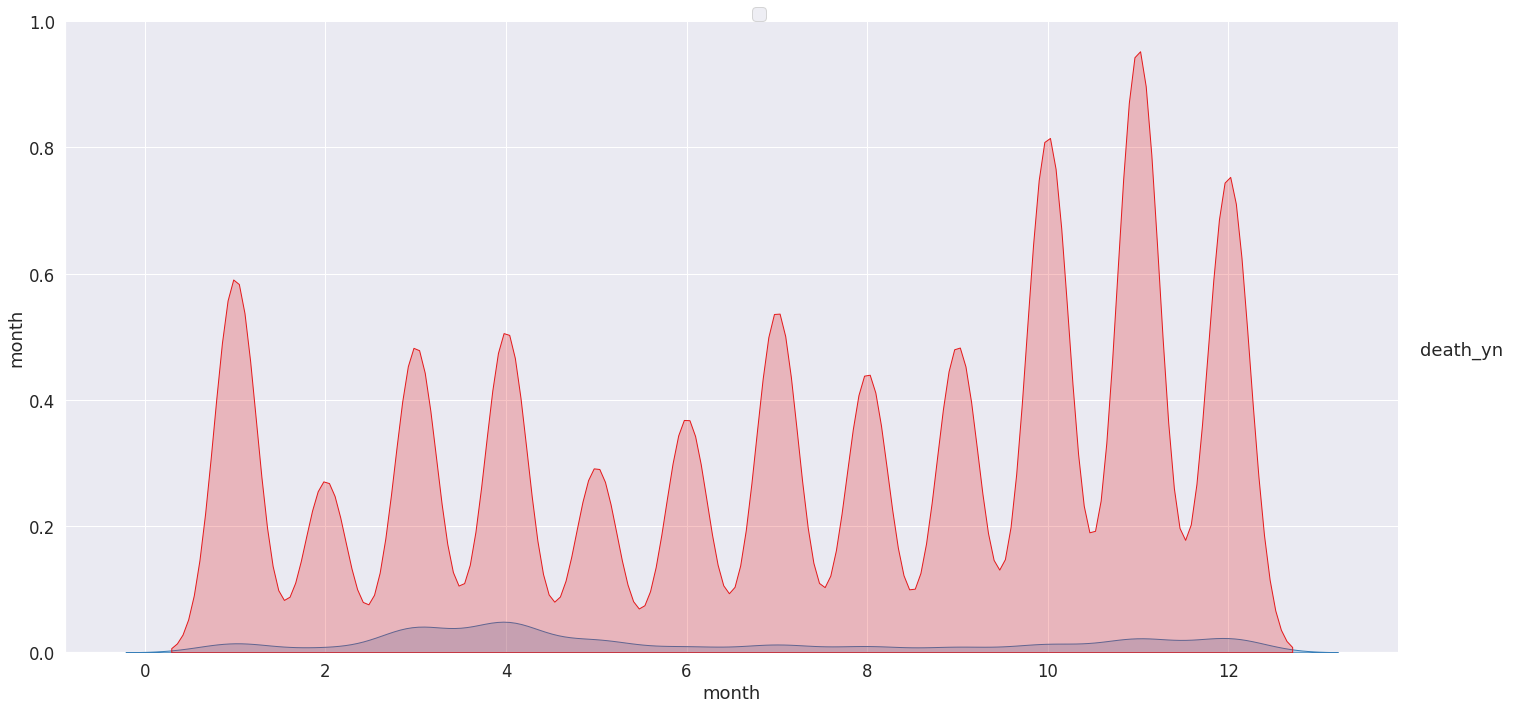

In [ ]:
# Reference: https://www.kaggle.com/artyomkolas/covid-19-case-surveillance-public-use-dataset

plt.figure(figsize=(20, 10))
plot_data = df[['death_yn', 'month']]

g = sns.pairplot(plot_data, hue='death_yn', palette='Set1', height=10, aspect=2)

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)

## Interesting Analysis on Sex:

Even though there are more female patients and where the medical condition rate is almost the same, males are more likely to be hospitalized, put under intensive care unit or die.

<Figure size 648x504 with 0 Axes>

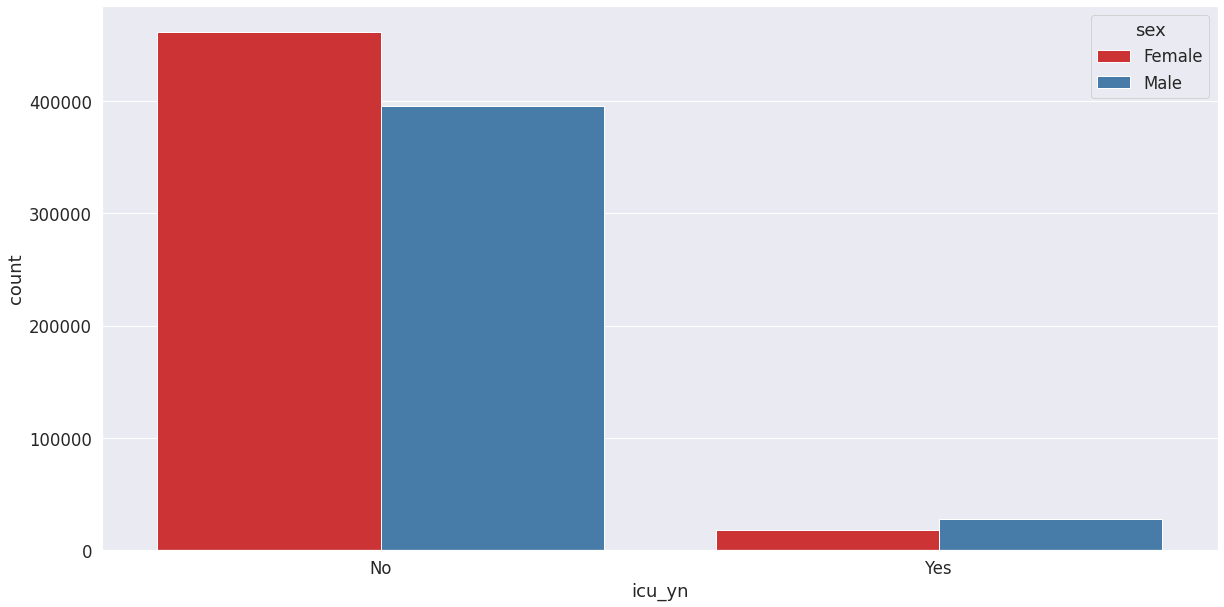

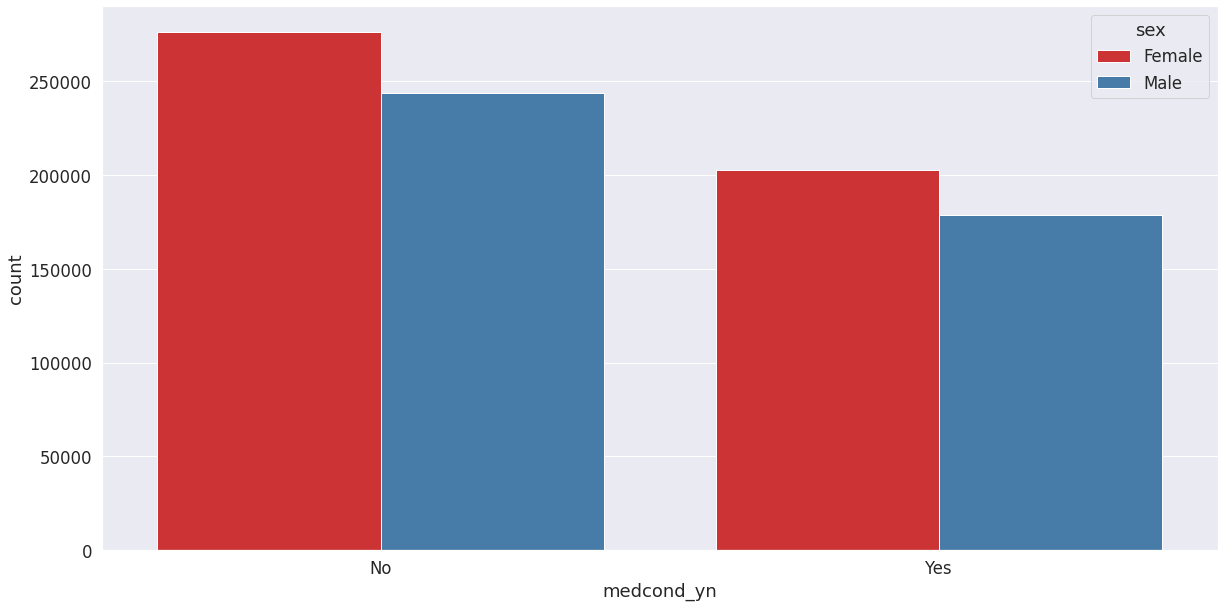

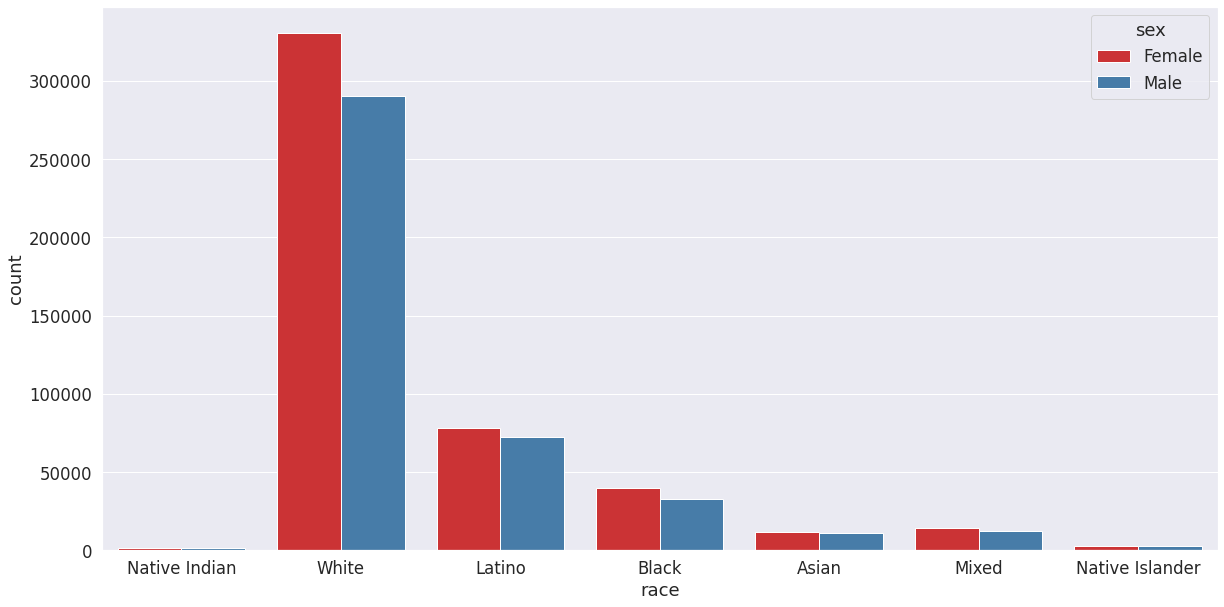

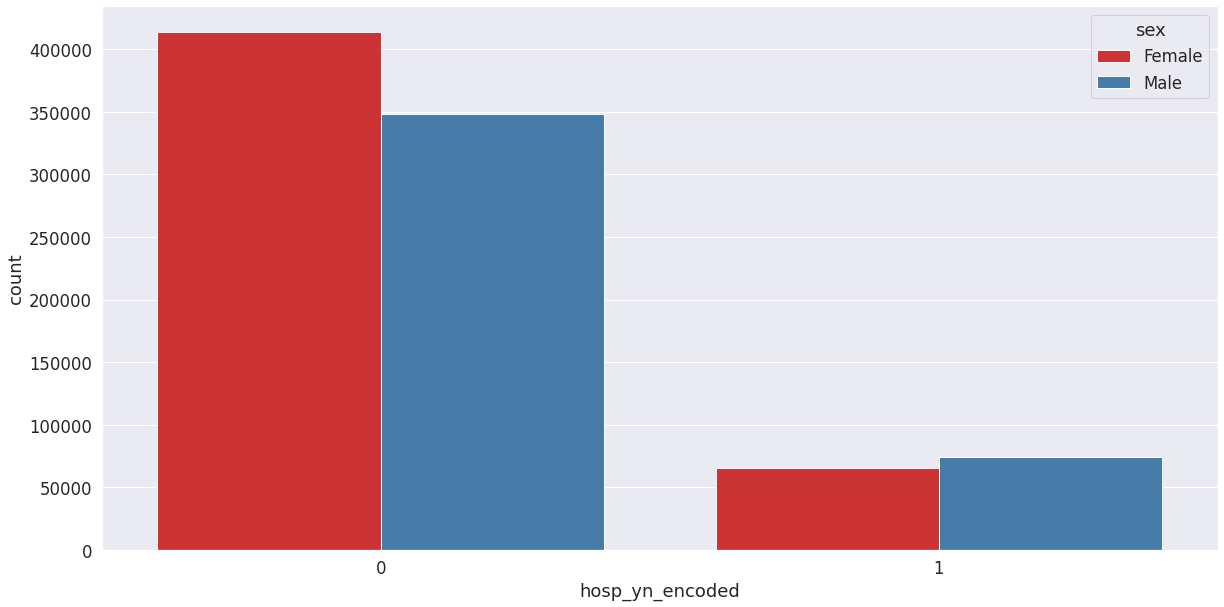

In [ ]:

target_column = ['sex']
columns_to_use = ['age_chunks', 'current_status', 'hosp_yn_encoded','icu_yn','medcond_yn','death_yn', 'race']
predictors = list(set(columns_to_use)-set(target_column))

plt.figure(figsize=(9, 7))
plt.style.use("ggplot")

sns.set(font_scale=1.5)

for el in predictors:
    plt.figure(figsize=(20, 10))
    plot_data = df[['sex', el]]
    try:
        sns.countplot(x=el, hue='sex', data=plot_data, palette='Set1')
    except:
        pass

In [ ]:
df.info()

columns_for_x = ['month','year','age_chunks','race_encoded', 'sex_encoded',
                 'current_status_encoded', 'hosp_yn_encoded','icu_yn_encoded', 'medcond_yn_encoded']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901599 entries, 0 to 901598
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cdc_case_earliest_dt     901599 non-null  datetime64[ns]
 1   current_status           901599 non-null  object        
 2   sex                      901599 non-null  object        
 3   age_group                901599 non-null  object        
 4   race_ethnicity_combined  901599 non-null  object        
 5   hosp_yn                  901599 non-null  object        
 6   icu_yn                   901599 non-null  object        
 7   death_yn                 901599 non-null  object        
 8   medcond_yn               901599 non-null  object        
 9   age_chunks               901599 non-null  int64         
 10  race                     901599 non-null  object        
 11  hosp_yn_encoded          901599 non-null  int64         
 12  current_status_e

# Model Training

First I needed to sample the data by 0.3 because it is so big and takes time. Since our time is limited, I wanted to be faster. If you want to check out with the full data, just make df_sample = df change and nothing to do more. 

Actually before training, we might have use uint coded datatype to get smaller data type to evaluate. I also standardized the values in anycase, but the data is somewhat standart enough. 

After that, I chosed encoded columns and date for features and death as the target value and splitted the dataset using train test split method by 0.25 - 0.75.


In [ ]:
df_sample = df.sample(frac=0.30)

X = df_sample[columns_for_x]
y = df_sample['death_encoded']

In [ ]:
# Standardizing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Decision Tree:

As it was suggested, my first model to train was Decision Tree. The accuracy rate was so high so I tried to run the confusion matrix to check out the overfitting and true/false negatives/positives.

Actually it seems like not overfitting by the numbers, but when we see the decision tree, we can easily say that it is way too overfit to data. Let's move on some other choices. 




In [ ]:
decision_tree = DecisionTreeClassifier()
clf = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

96.4

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Dead', 'Predicted Dead'],
    index=['True Not Dead', 'True Dead']
)

Predicted Not Dead  Predicted Dead
True Not Dead               63046             903
True Dead                    1890            1781

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134779 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134779 to fit



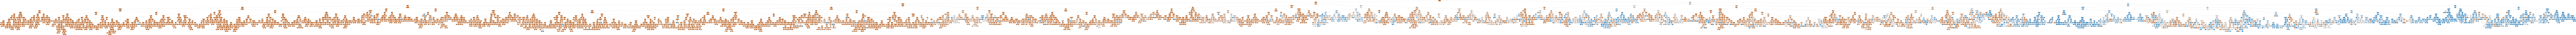

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns_for_x,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## XGBoost:

Since XGBoost is pretty popular and high performanced classifier, I wanted to use it as second model and also for the validation purposes, added kFold cross validation into the training.

The results were also good and was faster than decision tree. 

In [ ]:
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
import xgboost

# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 96.05% (0.09%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Dead', 'Predicted Dead'],
    index=['True Not Dead', 'True Dead']
)

Predicted Not Dead  Predicted Dead
True Not Dead               63040             909
True Dead                    1783            1888

## Ada Boost:

Standart deviation is just 0.01 higher than XGBoost:

In [ ]:
model = ensemble.AdaBoostClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.91% (0.10%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Dead', 'Predicted Dead'],
    index=['True Not Dead', 'True Dead']
)

Predicted Not Dead  Predicted Dead
True Not Dead               63123             826
True Dead                    1952            1719

## Logistic Regression:
Did not really think that accuracy would be that high because it does not really suitable for the problem in my opinion. Interesting.

In [ ]:
model = LogisticRegression()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.91% (0.11%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Dead', 'Predicted Dead'],
    index=['True Not Dead', 'True Dead']
)

Predicted Not Dead  Predicted Dead
True Not Dead               63158             791
True Dead                    1995            1676

In [ ]:
## All the Machine Learning Algorithms in a Chunk:

# Reference: https://www.programmersought.com/article/61551504484/

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

I just added these for the future usage, we can check these in our free time. Now I want to analyze other kind of target values for more interesting results.


---

# Intensive Care Unit Prediction

In this section, I will be just adjusting a little bit and checkout the results. I will not use death column because the intensive care unit happens before death. So, we want to learn whether people are under risk before death happens.

So, the accuracy is slightly less than death prediction. 

In [ ]:
columns_for_x = ['month','year','age_chunks','race_encoded', 'sex_encoded',
                 'current_status_encoded', 'hosp_yn_encoded', 'medcond_yn_encoded']
X = df_sample[columns_for_x]
y = df_sample['icu_yn_encoded']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.04% (0.14%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not ICUd', 'Predicted ICUd'],
    index=['True Not ICUd', 'True ICUd']
)

Predicted Not ICUd  Predicted ICUd
True Not ICUd               64039             162
True ICUd                    3219             200

## The Impact of Variables:

XGBoost have many false-negatives on ICUd: 3111 ICUd patients, only 230 of them was marked. Logistic was even worse. Not preferable. And decision tree gave the same result with logistic. Let's try the ICU analysis on KNIME!

In [ ]:
columns_for_x = ['age_chunks','race_encoded', 'sex_encoded',
                 'hosp_yn_encoded', 'medcond_yn_encoded']
X = df_sample[columns_for_x]
y = df_sample['icu_yn_encoded']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.01% (0.13%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not ICUd', 'Predicted ICUd'],
    index=['True Not ICUd', 'True ICUd']
)

Predicted Not ICUd  Predicted ICUd
True Not ICUd               64039             162
True ICUd                    3225             194

In [ ]:
model = LogisticRegression()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 94.96% (0.14%)


In [ ]:
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not ICUd', 'Predicted ICUd'],
    index=['True Not ICUd', 'True ICUd']
)

Predicted Not ICUd  Predicted ICUd
True Not ICUd               64118              83
True ICUd                    3342              77

In [ ]:
decision_tree = DecisionTreeClassifier()
clf = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [ ]:
acc_decision_tree

96.4

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not ICUd', 'Predicted ICUd'],
    index=['True Not ICUd', 'True ICUd']
)

Predicted Not ICUd  Predicted ICUd
True Not ICUd               64118              83
True ICUd                    3342              77

# KNIME PART

I had recreated the string manipulation and filtering process on KNIME, actually it was faster than I imagined. I think KNIME was better for data preprocessing.

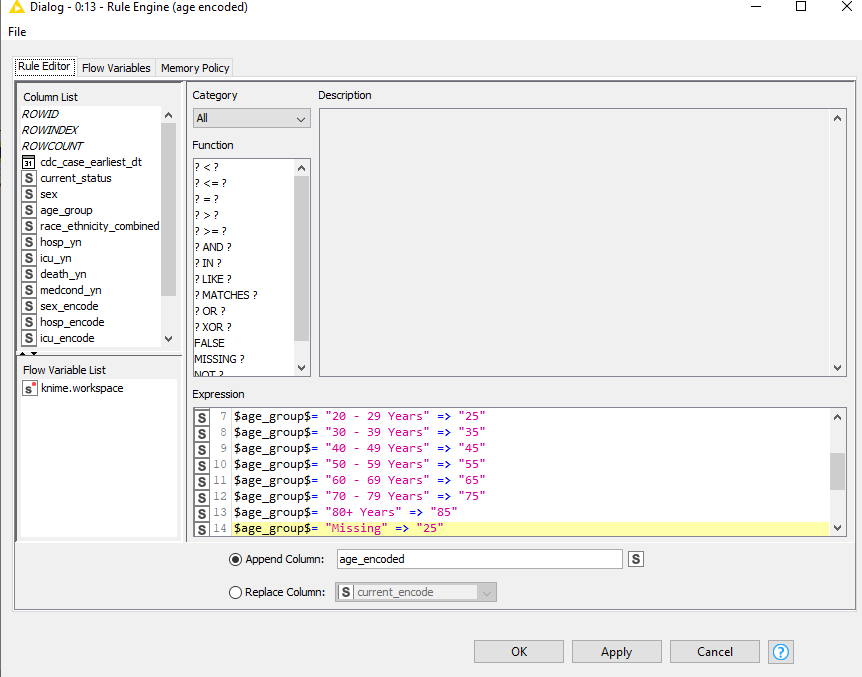

Here is the schema of the workflow:


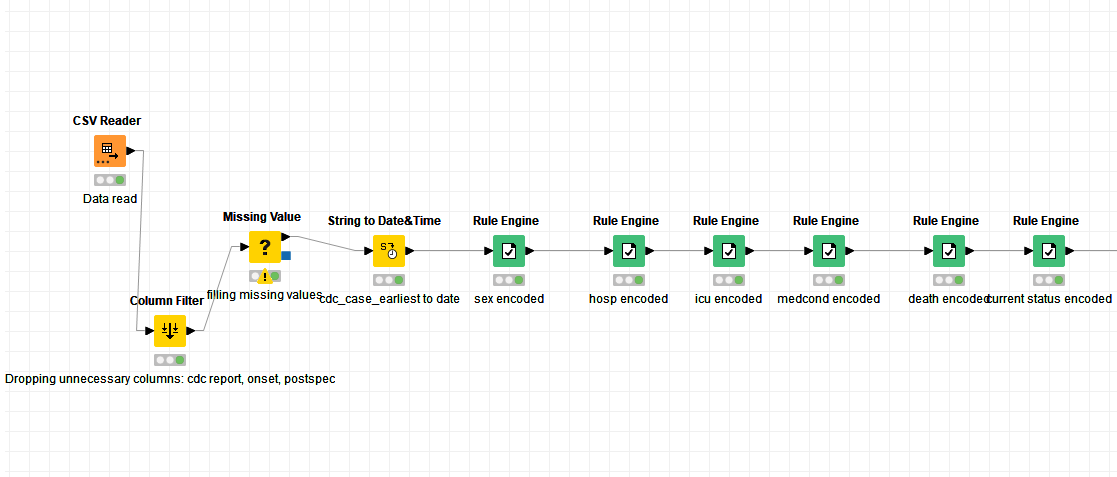

Part 2:

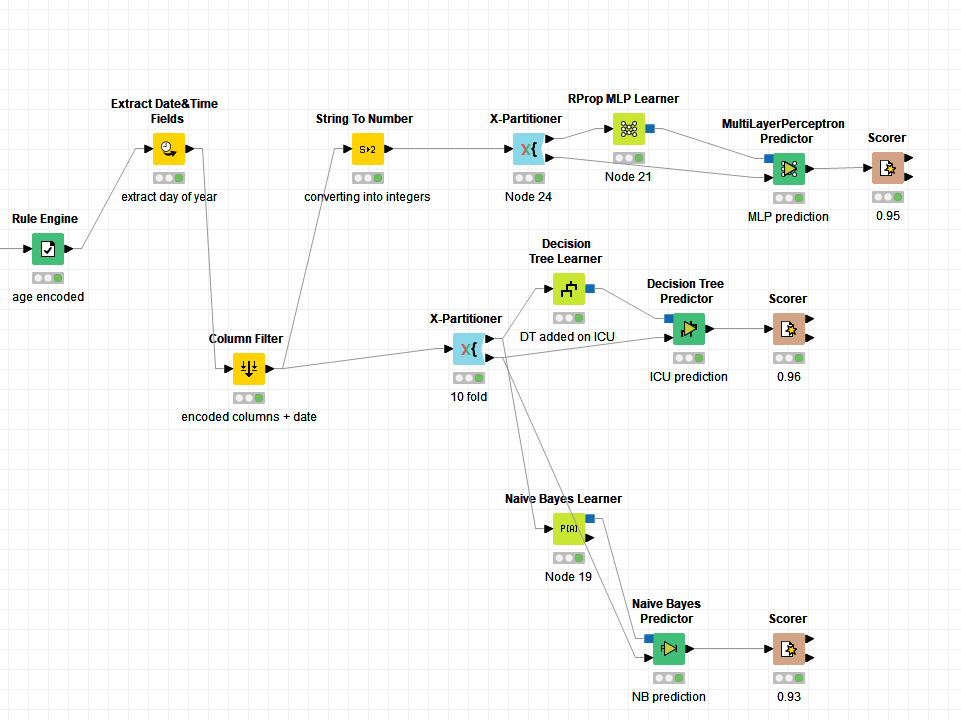

# Conclusions:

In KNIME, it is easy to use tools to manipulate or encode data. So it is a suitable tool for data preprocessing. However, the visualization and ML Kits are more preferable in Python. 

As the expected, death risk is getting higher and higher with age. There is positive correlation between death, age, putting under intensive care unit, hospitalization and medical condiiton. 

Race has almost no effect. However sex is important, graphs show that males are more likely to have problems with COVID-19, where females are more likely to get better sooner.

Even though the number of cases got increased by the time, the death rate seems to be get lowered. This may be caused by vaccination or learning how to fight with this disease by time passes.

All the models seem to be working quite good, however they are more likely to overfit. Using cross validation methods and then checking the confusion matrices show us the XGBoost had the best results for right classification of the negative samples. 

The models were more successful on predicting the death rather than the intensive care unit status.  

We can use more and more models if we had time and consider the different relationships of these columns. 

# Bibliography

* Model Fitting on Titanic Dataset - 
https://www.programmersought.com/article/61551504484/

* CDC COVID-19 Case Surveillance Public Dataset Data Profile -
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-Profile/xigx-wn5e

* A Data Science Framework: To Achieve \%99 Accuracy -
https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

* Machine Learning with Python: Complete Tutorial -
https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec

* Kaggle: Covid-19 Case Surveillance - Classification -
https://www.kaggle.com/hongnwong3/covid-19-case-surveillance-classification
* Kaggle: Covid-19 Case Surveillance + Modelling - 
\href{https://www.kaggle.com/afafathar3007/covid-19-case-surveillance-modelling}{Link}

* Kaggle: Just A Bunch of Interactive Charts, Nothing New - 
https://www.kaggle.com/heyytanay/just-a-bunch-of-interactive-charts-nothing-new
 
* Kaggle: Covid19-2020 year - 
https://www.kaggle.com/fluffyhamster/covid19-2020-year
    
    